# Exploring U.S. school finances for international expansion

### Project Description
Our client is an _international educational company that launches private elementary schools in different countries_. They have recently decided to expand their network to the U.S. Based on the provided datasets, we will analyze the current financial status of educational institutions in the U.S. and offer insights into which states' schools generate more income, as well as identify the most favorable locations where it’s better to start business from.

### Dataset description
The United States Census Bureau conducts annual surveys to assess the finances of elementary and high schools. This data has been programmatically organized here in two files; one for school districts (districts.csv) and one for states (states.csv).

Also included is a summary of data from the NAEP (National Assessment of Educational Progress), contained in naep.csv.


## Preparing data for analysis

In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import plotly.express as px
!pip install Jinja2 -q
!pip install sidetable -q
import sidetable
!pip install scikit-learn -q
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the datasets
states=pd.read_csv('states.csv')
districts=pd.read_csv('districts.csv')
naep=pd.read_csv('naep.csv')

### States dataset

In [3]:
# looking at the genral info of states df
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1275 non-null   object 
 1   YEAR                          1275 non-null   int64  
 2   ENROLL                        1224 non-null   float64
 3   TOTAL_REVENUE                 1275 non-null   int64  
 4   FEDERAL_REVENUE               1275 non-null   int64  
 5   STATE_REVENUE                 1275 non-null   int64  
 6   LOCAL_REVENUE                 1275 non-null   int64  
 7   TOTAL_EXPENDITURE             1275 non-null   int64  
 8   INSTRUCTION_EXPENDITURE       1275 non-null   int64  
 9   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   int64  
 10  OTHER_EXPENDITURE             1224 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 119.7+ KB


In [4]:
# looking at the first 5 rows of the df
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [5]:
# checking whether there are any missing values
states.isnull().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

In both, enroll and other expenditure columns, there is 51 missing value.

In [6]:
# looking at the rows with missing values
states[(states['ENROLL'].isna()) & (states['OTHER_EXPENDITURE'].isna())].head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [7]:
# checking the number of rows
len(states[(states['ENROLL'].isna()) & (states['OTHER_EXPENDITURE'].isna())])

51

In [8]:
# checking in which years we do have missing values in both columns
states[(states['ENROLL'].isna()) & (states['OTHER_EXPENDITURE'].isna())].YEAR.unique()

array([1992], dtype=int64)

It appears there are missing values in enroll and other expenditure columns only for data that's from 1992.
We will drop the rows with missing values and exclude year 1992 from our analysis.

In [9]:
# dropping missing values
states = states.dropna()
states = states.reset_index(drop=True)

In [10]:
# checking whether there are any duplicates
states.duplicated().sum()

0

In [11]:
# states.head()
# states.info()

### Districts dataset

In [12]:
# checking districts dataset
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374161 entries, 0 to 374160
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STATE     374161 non-null  object 
 1   ENROLL    358293 non-null  float64
 2   NAME      374161 non-null  object 
 3   YRDATA    374161 non-null  int64  
 4   TOTALREV  374161 non-null  int64  
 5   TFEDREV   374161 non-null  int64  
 6   TSTREV    374161 non-null  int64  
 7   TLOCREV   374161 non-null  int64  
 8   TOTALEXP  374161 non-null  int64  
 9   TCURINST  374161 non-null  int64  
 10  TCURSSVC  374161 non-null  int64  
 11  TCURONON  358293 non-null  float64
 12  TCAPOUT   374161 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 37.1+ MB


In [13]:
# looking at the first 5 rows of the df
districts.head()

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [14]:
# looking at the total number of missing values in all of the columns
districts.stb.missing(style=True)

,missing,total,percent
ENROLL,"15,868","374,161",4.24%
TCURONON,"15,868","374,161",4.24%
STATE,0,"374,161",0.00%
NAME,0,"374,161",0.00%
YRDATA,0,"374,161",0.00%
TOTALREV,0,"374,161",0.00%
TFEDREV,0,"374,161",0.00%
TSTREV,0,"374,161",0.00%
TLOCREV,0,"374,161",0.00%
TOTALEXP,0,"374,161",0.00%


In [15]:
# counting the rows where both 'ENROLL' and 'TCURONON' have missing values
# - making sure it's the same rows indeed
len(districts[(districts['ENROLL'].isna()) & (districts['TCURONON'].isna())])

15868

In [16]:
# checking the years in which we do have missing values in both columns
districts[(districts['ENROLL'].isna()) & (districts['TCURONON'].isna())].YRDATA.unique()

array([1992], dtype=int64)

Just like in the states dataset, the districts dataset also lacks information on enrollment and miscellaneous current spending ('TCURONON') for the year 1992.

We will drop data for 1992 from districts dataset as well.

In [17]:
# dropping missing values
districts = districts.dropna()
districts = districts.reset_index(drop=True)

In [18]:
#districts.info()

In [19]:
# checking whether there are any duplicates
districts.duplicated().sum()

0

### NAEP dataset

In [20]:
# looking at the genral info
naep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YEAR          2305 non-null   int64 
 1   STATE         2305 non-null   object
 2   AVG_SCORE     2305 non-null   object
 3   TEST_SUBJECT  2305 non-null   object
 4   TEST_YEAR     2305 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 90.2+ KB


In [21]:
# looking at the first 5 rows
naep.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR
0,2017,Alabama,232.170687741509,Mathematics,4
1,2017,Alaska,230.456277558902,Mathematics,4
2,2017,Arizona,234.435788152091,Mathematics,4
3,2017,Arkansas,233.848143678937,Mathematics,4
4,2017,California,232.262940994562,Mathematics,4


For some reason AVG SCORE column is object data type column. Let's look into it deeper and verify whether there's data for 1992.

In [22]:
# checking AVG SCORE in 1992
naep.query('YEAR==1992').head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR
510,1992,Alabama,208.327875923738,Mathematics,4
511,1992,Alaska,—,Mathematics,4
512,1992,Arizona,215.2539320246,Mathematics,4
513,1992,Arkansas,210.20602809793,Mathematics,4
514,1992,California,208.398960917183,Mathematics,4


It appears there are unusual values in the AVG SCORE.

In [23]:
# counting how many rows include "-"
len(naep.query('AVG_SCORE == "—"'))

116

In [24]:
# looking whether there are more rows with other values in AVG SCORE
naep['AVG_SCORE_NUMERIC'] = pd.to_numeric(naep['AVG_SCORE'], errors='coerce')
non_numeric_rows = naep[naep['AVG_SCORE_NUMERIC'].isna()]
# dropping the temporary column
non_numeric_rows = non_numeric_rows.drop(columns=['AVG_SCORE_NUMERIC'])
# checking the amount of non numeric rows
non_numeric_rows
len(non_numeric_rows)

130

In [25]:
non_numeric_rows.AVG_SCORE.unique()

array(['—', '‡'], dtype=object)

In [26]:
# changing datatype of AVG_SCORE column to numeric
naep['AVG_SCORE'] = pd.to_numeric(naep['AVG_SCORE'], errors='coerce')
# dropping the rows
naep = naep.dropna()
naep = naep.reset_index(drop=True)
# dropping the temporary column
naep.drop(columns=['AVG_SCORE_NUMERIC'], inplace=True)

In [27]:
# looking at the general info after changes were made
naep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          2175 non-null   int64  
 1   STATE         2175 non-null   object 
 2   AVG_SCORE     2175 non-null   float64
 3   TEST_SUBJECT  2175 non-null   object 
 4   TEST_YEAR     2175 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 85.1+ KB


In [28]:
# checking whether there are any duplicates
naep.duplicated().sum()

0

## Studying the data

### Profitability

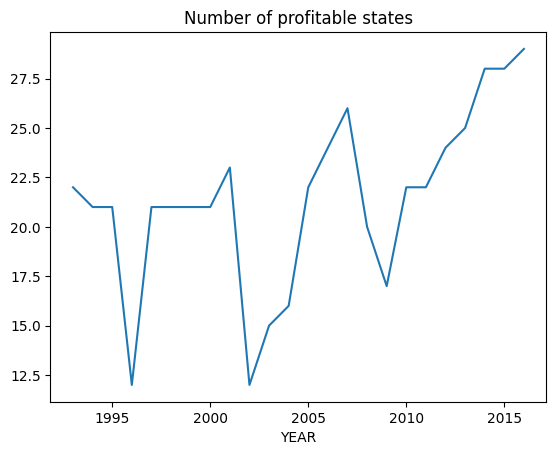

In [29]:
# adding total profit column to states df
# calculating the total profit for each state by subtracting total expenditure from total revenue
states['TOTAL_PROFIT']=states['TOTAL_REVENUE']-states['TOTAL_EXPENDITURE']
# querying states where total profit is greater than 0, grouping by year, and counting the number of profitable states
# plotting a line graph of number of profitable states over the years
states.query('TOTAL_PROFIT>0').groupby('YEAR')['STATE'].count().plot(kind='line')
plt.title('Number of profitable states')
plt.show()

The data shows a fluctuating trend in the number of states with positive total profit from 1993 to 2016.

There's a noticeable dip around the early 2000s, when U.S. experienced a stock market crash.

 And also around 2008, when there was global financial crisis that may have affected education sector in U.S. as well.

After 2010, there's a noticeable upward trend.

In [30]:
# looking at top 10 states by total profit in 2016 
states.query('YEAR==2016').sort_values(by=['TOTAL_PROFIT'],ascending=False)[['STATE','TOTAL_PROFIT']].head(10)             

,STATE,TOTAL_PROFIT
1177,California,3897129
1195,Michigan,1414616
1187,Indiana,1196874
1179,Connecticut,593242
1175,Arizona,516023
1194,Massachusetts,446824
1193,Maryland,417130
1208,Ohio,414013
1203,New Jersey,347190
1184,Hawaii,297425


In [31]:
# creating a pivot table for total profit in different states from 2010 onwards
states_pivot=states.query('YEAR>=2010').pivot_table(columns='YEAR', index='STATE', values='TOTAL_PROFIT', aggfunc='max')
states_pivot.columns=['2010','2011','2012','2013','2014','2015','2016']
# calculating the difference in total profit between 2016 and 2010
states_pivot['2016 versus 2010']=states_pivot['2016']-states_pivot['2010']
# calculating the percentage change in total profit between 2016 and 2010
states_pivot['2016 versus 2010_%']=states_pivot['2016 versus 2010']/states_pivot['2010'].abs()
# calculating the percentage change in total profit between 2016 and 2015
states_pivot['2016 versus 2015_%']=(states_pivot['2016']-states_pivot['2015'])/states_pivot['2015'].abs()

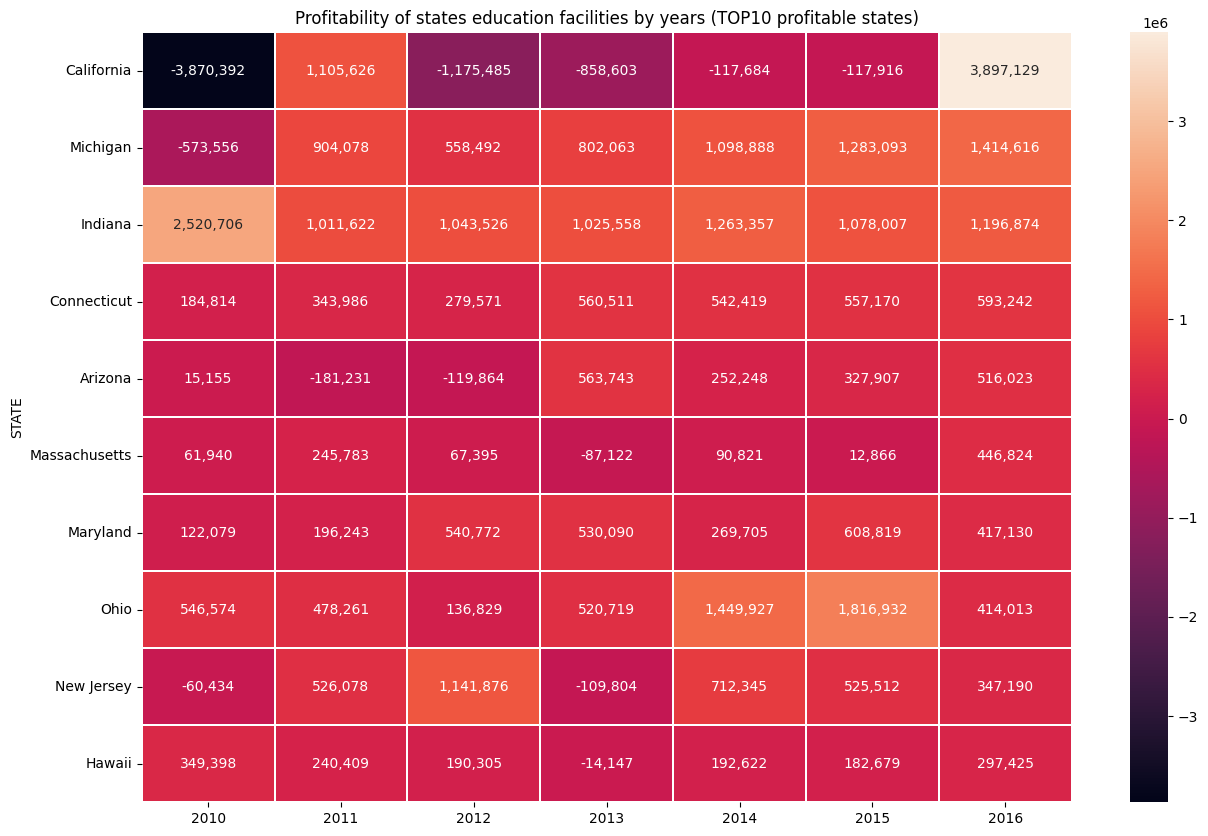

In [32]:
# plotting a heatmap of profitability of states over the years
# sorting the data by 2016 profitability
plt.figure(figsize=(15,10))
plt.title('Profitability of states education facilities by years (TOP10 profitable states)')
sns.heatmap(states_pivot[['2010','2011','2012','2013','2014','2015','2016']].sort_values(by='2016',ascending=False).head(10),fmt=',d',annot=True, linewidth=.1)
plt.show()

In [33]:
states_pivot.sort_values(by='2016',ascending=False).head(10)

,2010,2011,2012,2013,2014,2015,2016,2016 versus 2010,2016 versus 2010_%,2016 versus 2015_%
STATE,,,,,,,,,,
California,-3870392,1105626,-1175485,-858603,-117684,-117916,3897129,7767521,2.006908,34.050044
Michigan,-573556,904078,558492,802063,1098888,1283093,1414616,1988172,3.466396,0.102505
Indiana,2520706,1011622,1043526,1025558,1263357,1078007,1196874,-1323832,-0.525183,0.110266
Connecticut,184814,343986,279571,560511,542419,557170,593242,408428,2.209941,0.064741
Arizona,15155,-181231,-119864,563743,252248,327907,516023,500868,33.049687,0.573687
Massachusetts,61940,245783,67395,-87122,90821,12866,446824,384884,6.213820,33.729053
Maryland,122079,196243,540772,530090,269705,608819,417130,295051,2.416886,-0.314854
Ohio,546574,478261,136829,520719,1449927,1816932,414013,-132561,-0.242531,-0.772136
New Jersey,-60434,526078,1141876,-109804,712345,525512,347190,407624,6.744945,-0.339330


In [34]:
# states_pivot.sort_values(by='2016 versus 2010_%',ascending=False).head(10)
# states_pivot.sort_values(by='2016 versus 2010',ascending=False).head(10)
# states_pivot.sort_values(by='2016 versus 2015_%',ascending=False).head(10)

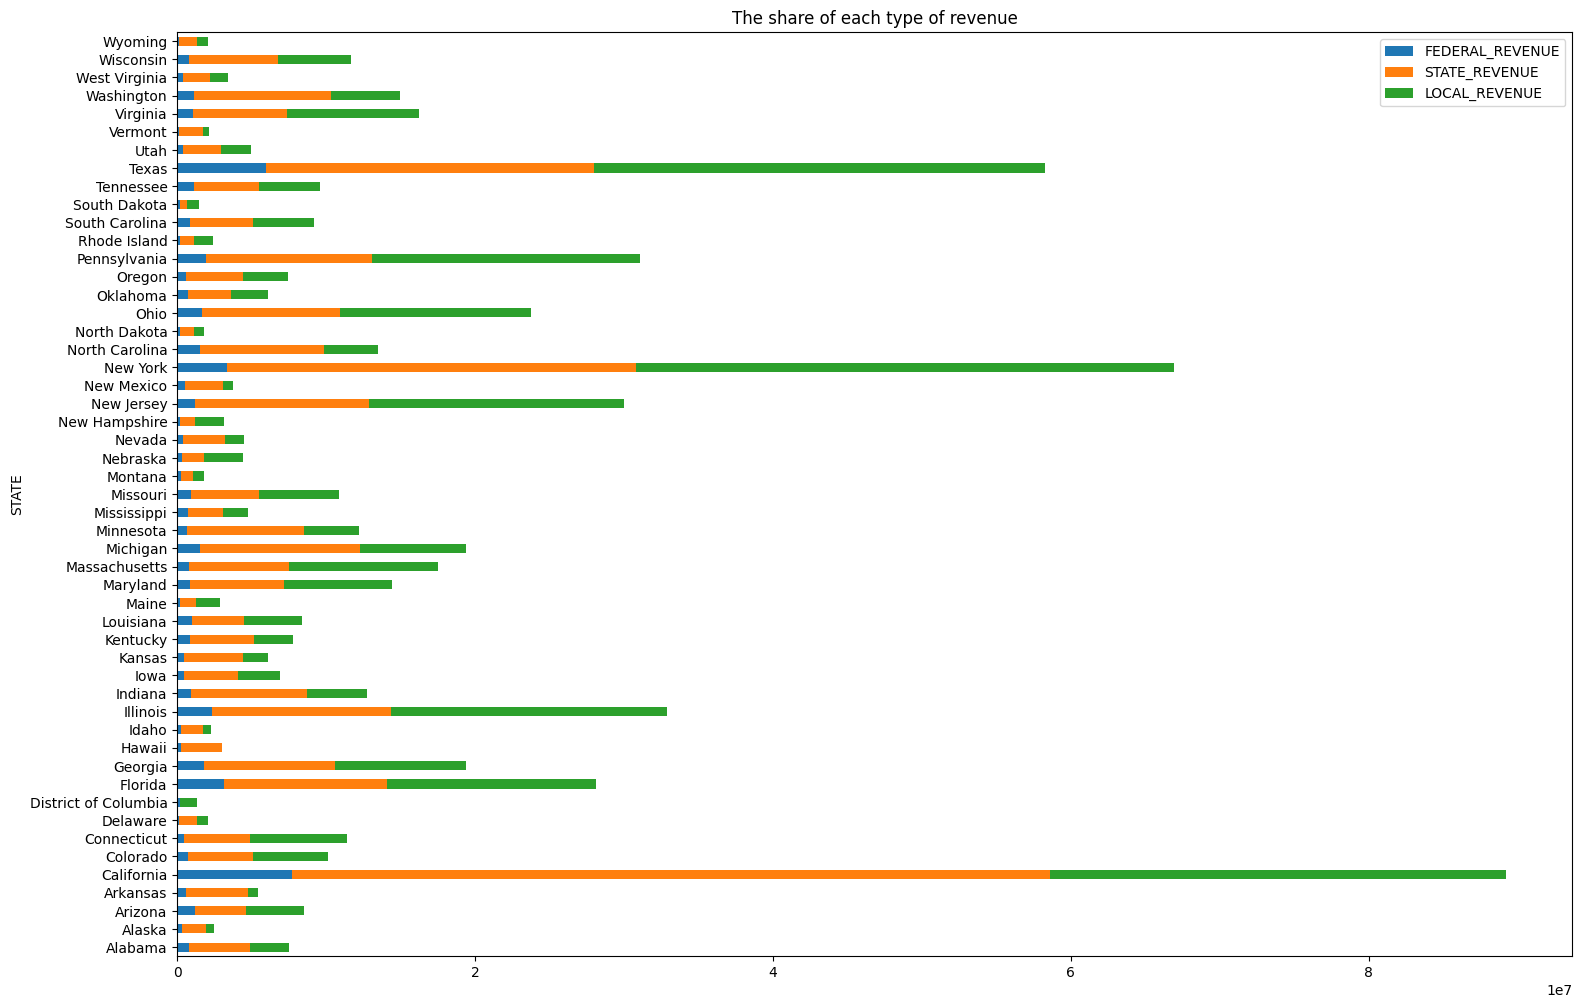

In [35]:
# plotting a horizontal bar graph showing the share of each type of revenue in different states in 2016
states.query('YEAR==2016')[['STATE','FEDERAL_REVENUE',
            'STATE_REVENUE','LOCAL_REVENUE']].plot(kind='barh',x='STATE', stacked=True, 
                                                   title='The share of each type of revenue',figsize=(18,12))
plt.show()

We can see that the education revenue sources varied across states in 2016.
It appears that often federal revenue for education was lower than both, state and local revenue.
For example, California had significantly higher state and local funding compared to federal funding.

In [36]:
# adding revenue per student column to states df
states['USD_per_student']=states['TOTAL_REVENUE']*1000/states['ENROLL']
# sorting the df by top 10 states with highest revenue per student in 2016
states.query('YEAR==2016').sort_values(by=['USD_per_student'],ascending=False)[['STATE','USD_per_student']].head(10)  

,STATE,USD_per_student
1181,District of Columbia,27509.909798
1205,New York,25825.581400
1218,Vermont,24011.241958
1179,Connecticut,22862.482833
1203,New Jersey,21995.793248
1223,Wyoming,21634.190729
1211,Pennsylvania,19761.813133
1194,Massachusetts,18983.879986
1174,Alaska,18831.125403
1212,Rhode Island,17941.227887


In [37]:
# adding profit per student column to states df
states['USD_PROFIT_per_student']=states['TOTAL_PROFIT']*1000/states['ENROLL']
# sorting the df by top 10 states with highest profit per student in 2016
states.query('YEAR==2016').sort_values(by=['USD_PROFIT_per_student'],ascending=False)[['STATE','USD_PROFIT_per_student']].head(10)

,STATE,USD_PROFIT_per_student
1184,Hawaii,1634.248194
1187,Indiana,1193.655904
1179,Connecticut,1187.685938
1195,Michigan,1059.071822
1192,Maine,774.342753
1177,California,626.847284
1185,Idaho,602.185200
1175,Arizona,549.970478
1194,Massachusetts,485.135647
1193,Maryland,474.444834


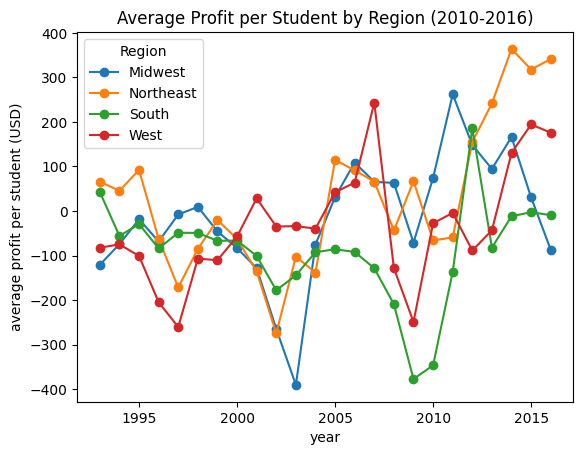

In [38]:
# categorizing U.S. states into regions
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

# adding region column to states df, assigning each state its' region from the dictionary
states['REGION'] = states['STATE'].map(lambda state: next((region for region, states in regions.items() if state in states), 'Other'))

# grouping states by region and year, calculating the mean profit per student
regional_data = states.groupby(['REGION', 'YEAR'])['USD_PROFIT_per_student'].mean().reset_index()

pivot_regional_data = regional_data.pivot(index='YEAR', columns='REGION', values='USD_PROFIT_per_student')

# plotting line graph of average profit per student over years
pivot_regional_data.plot(kind='line', marker='o')
plt.title('Average Profit per Student by Region (2010-2016)')
plt.xlabel('year')
plt.ylabel('average profit per student (USD)')
plt.legend(title='Region')
plt.show()


It appears that between 2010 - 2016, there was an upward trend in the Northeast and West regions.

And, Midwest and South regions appear to had decline in average profit per student.


In [39]:
# creating a pivot table for profit per student in different states from 2010 onwards
states_profit_per_student=states.query('YEAR>=2010').pivot_table(columns='YEAR', index='STATE', values='USD_PROFIT_per_student', aggfunc='max')
states_profit_per_student.columns=['2010','2011','2012','2013','2014','2015','2016']

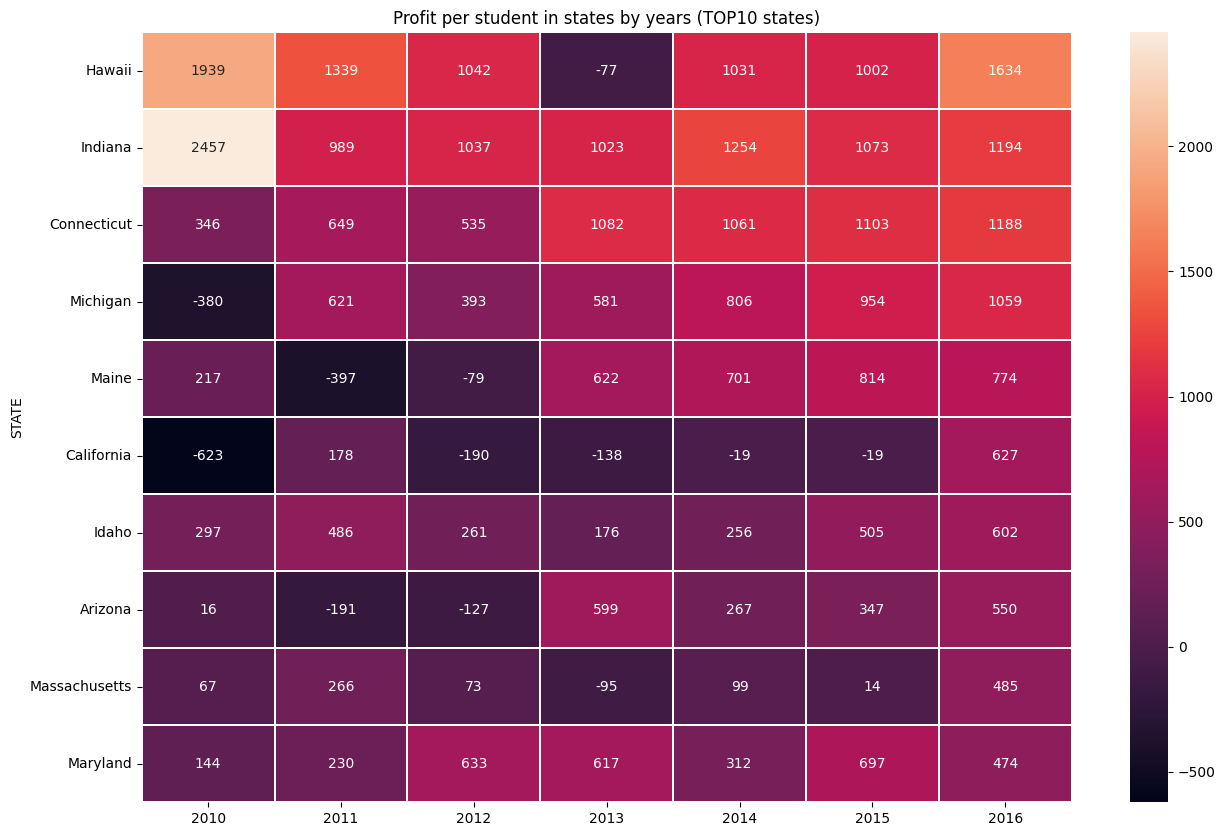

In [40]:
# plotting a heatmap of profitability per student in different states over the years
# sorting the data by 2016 and displaying top 10 states
plt.figure(figsize=(15,10))
plt.title('Profit per student in states by years (TOP10 states)')
sns.heatmap(states_profit_per_student[['2010','2011','2012','2013','2014','2015','2016']].sort_values(by='2016',ascending=False).head(10),fmt='.0f',annot=True, linewidth=.1)
plt.show()

In [41]:
# creating a pivot table of student enrollment in different states from 2010 onward
states_enroll=states.query('YEAR>=2010').pivot_table(columns='YEAR', index='STATE', values='ENROLL', aggfunc='max')
states_enroll.columns=['2010','2011','2012','2013','2014','2015','2016']
# calculating the difference in enrollment between 2016 and 2010
states_enroll['2016 versus 2010']=states_enroll['2016']-states_enroll['2010']
# calculating the the percentage change in enrollment between 2016 and 2010
states_enroll['2016 versus 2010_%']=states_enroll['2016 versus 2010']/states_enroll['2010'].abs()
# calculating the the percentage change in enrollment between 2016 and 2015
states_enroll['2016 versus 2015_%']=(states_enroll['2016']-states_enroll['2015'])/states_enroll['2015'].abs()
states_enroll[['2010','2011','2012','2013','2014','2015','2016']]=states_enroll[['2010','2011','2012','2013','2014','2015','2016']].astype('int')

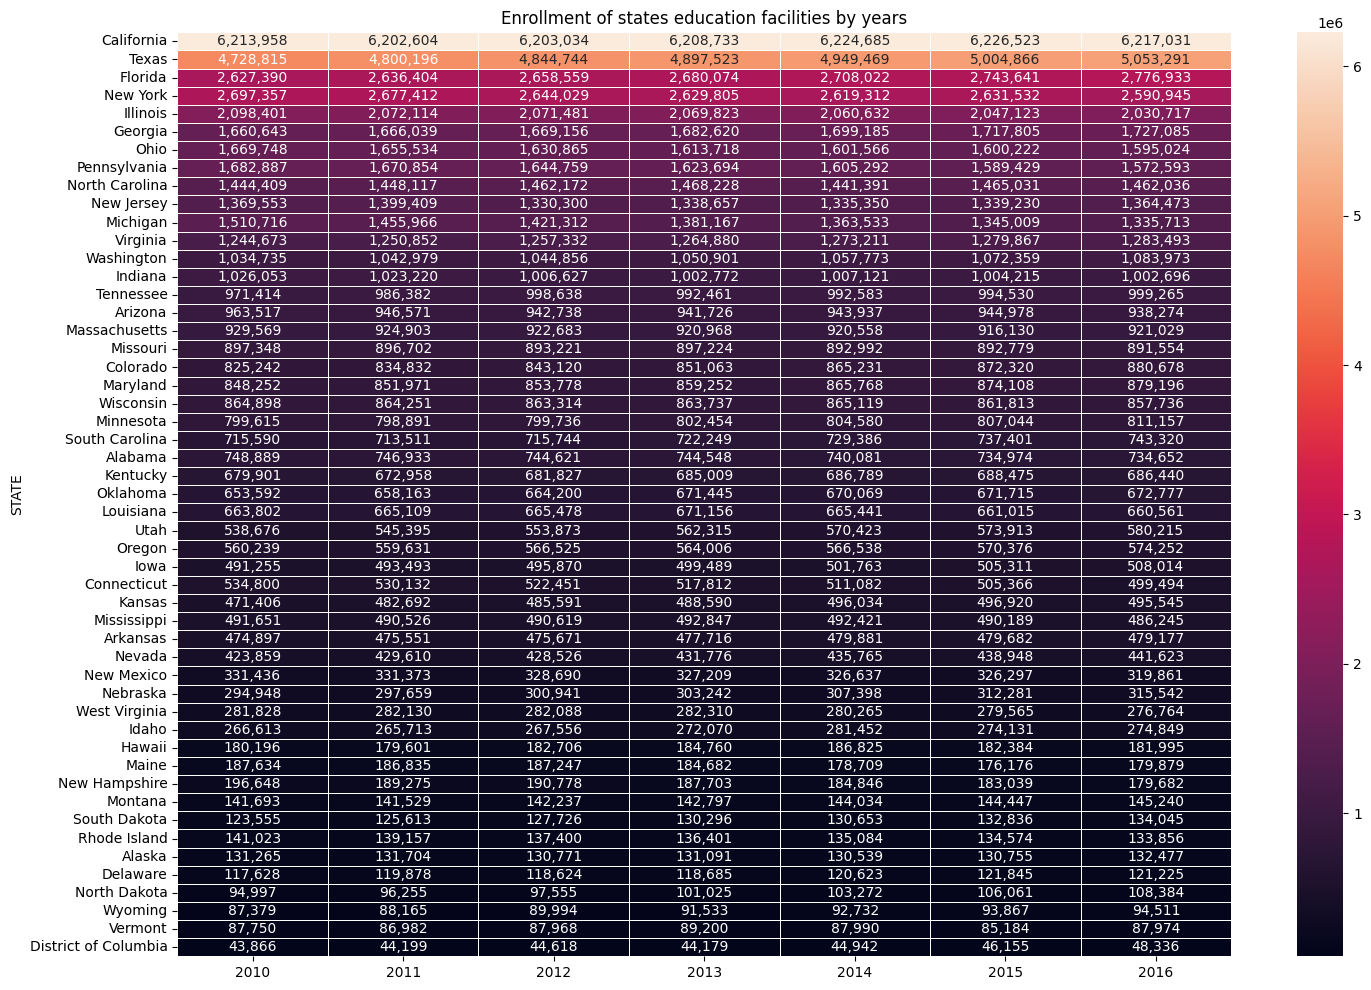

In [42]:
# plotting a heatmap of student enrollment in different states from 2010 - 2016
# sorting the data by 2016 enrollment
plt.figure(figsize=(17,12))
plt.title('Enrollment of states education facilities by years')
sns.heatmap(states_enroll[['2010','2011','2012','2013','2014','2015','2016']].sort_values(by='2016',ascending=False),fmt=',d',annot=True, linewidth=0.5)
plt.show()

California consistently had the highest student enrollment from 2010 to 2016, maintaining its top position.

Texas and Florida also maintained high enrollments.

New York and Illinois experienced slight decline.

In comparison, Wyoming, Vermont and the District of Columbia had lower enrollments and remained at the bottom of the list.

### Expenditures

Further we'll look deeper into the expenditures of each state and, specifically, focusing on those states with lower capital outlay expenditures. 

States with lower capital outlay expenditures may suggest a less competitive environment and opportunity for a new private elementary school to stand out.

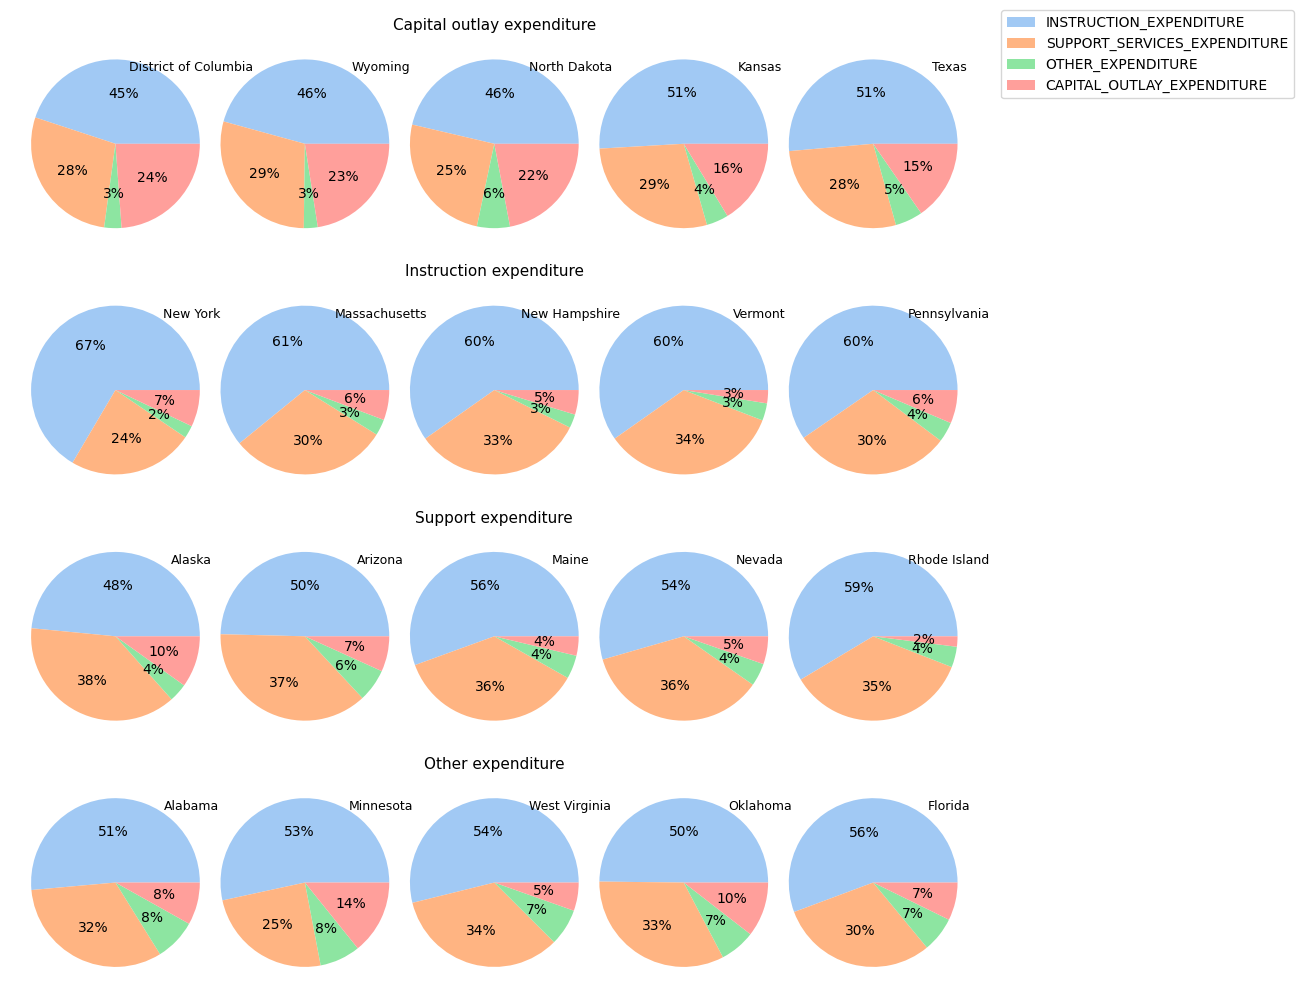

In [43]:
# creating subplots of expenditure types
fig, axs = plt.subplots(4,5, figsize=(10,10))
colors = sns.color_palette('pastel')[0:4]
columns = ["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]

# querying data for 2016
expenditure_2016 = states.query('YEAR == 2016').copy()
# calculating the total documented expenditure for each state
total_documented_expenditure = (expenditure_2016["INSTRUCTION_EXPENDITURE"] + expenditure_2016["SUPPORT_SERVICES_EXPENDITURE"] + expenditure_2016["OTHER_EXPENDITURE"] + expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"]
)
# adding expenditure ratio columns to expenditure_2016 df
expenditure_2016["INSTRUCTION_RATIO"] = expenditure_2016["INSTRUCTION_EXPENDITURE"] / total_documented_expenditure
expenditure_2016["SUPPORT_SERVICES_RATIO"] = expenditure_2016["SUPPORT_SERVICES_EXPENDITURE"] / total_documented_expenditure
expenditure_2016["OTHER_RATIO"] = expenditure_2016["OTHER_EXPENDITURE"] / total_documented_expenditure
expenditure_2016["OUTLAY_RATIO"] = expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"] / total_documented_expenditure


# setting titles for each row in the middle

row_titles = ["Capital outlay expenditure", "Instruction expenditure", "Support expenditure", "Other expenditure"]

common_title_fontsize = 11
common_title_y = 1
common_title_loc = 'center'

 
for row_idx in range(len(axs)):
    common_title_ax = axs[row_idx, len(axs[row_idx]) // 2]
    common_title_ax.set_title(row_titles[row_idx], fontsize=common_title_fontsize, loc="center")

idx = 0

# iterating through the df to create pie charts of the top 5 states by capital outlay expenditure proportion

for index, row in expenditure_2016.sort_values(by="OUTLAY_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')
    idx += 1

# iterating through the df to create pie charts of the top 5 states by instruction expenditure proportion
for index, row in expenditure_2016.sort_values(by="INSTRUCTION_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')
    idx += 1

# iterating through the df to create pie charts of the top 5 states by support services expenditure proportion
for index, row in expenditure_2016.sort_values(by="SUPPORT_SERVICES_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')
    idx += 1

# iterating through the df to create pie charts of the top 5 states by other expenditure proportion
for index, row in expenditure_2016.sort_values(by="OTHER_RATIO", ascending=False).head().iterrows():
    axs[idx // 5, idx % 5].pie(row[columns], autopct='%.0f%%', colors=colors)
    axs[idx // 5, idx % 5].text(0.9, 0.9, row["STATE"], fontsize=9, ha='center', va='center')
    idx += 1

# setting legend
fig.legend(columns, loc='upper left', bbox_to_anchor=(1, 1))
fig.subplots_adjust(hspace=7) 
plt.tight_layout()
plt.show()


District of Columbia, Wyoming, North Dakota, Kansas and Texas allocate significant portion of their budgets to capital investments.

It may suggest that there's challenging environment and high competition for launching a new school in these states.

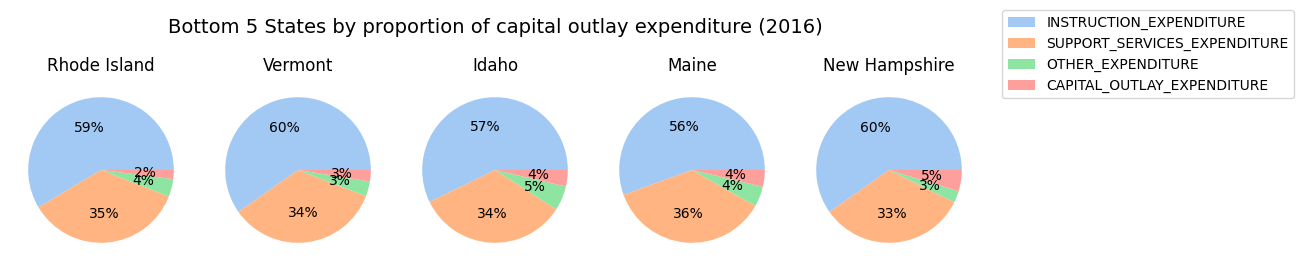

In [44]:
# creating subplots for capital outlay expenditures
fig, axs = plt.subplots(1,5, figsize=(10,3))
colors = sns.color_palette('pastel')[0:4]
columns = ["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]

# querying data for 2016
expenditure_2016 = states.query('YEAR == 2016').copy()
# calculating the total documented expenditure for each state
total_documented_expenditure = (expenditure_2016["INSTRUCTION_EXPENDITURE"] + expenditure_2016["SUPPORT_SERVICES_EXPENDITURE"] + expenditure_2016["OTHER_EXPENDITURE"] + expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"]
)

# adding a new column in expenditure_2016 df with the proportion of capital outlay expenditure
expenditure_2016["OUTLAY_RATIO"] = expenditure_2016["CAPITAL_OUTLAY_EXPENDITURE"] / total_documented_expenditure

idx = 0

# iterating through the df to create pie charts of the bottom 5 states by capital outlay expenditure proportion
for index, row in expenditure_2016.sort_values(by="OUTLAY_RATIO", ascending=True).head().iterrows():
    axs[idx].pie(row[columns], autopct='%.0f%%', colors=colors)
    axs[idx].set_title(row["STATE"])
    idx += 1
    
# setting title and legend
title = fig.suptitle('Bottom 5 States by proportion of capital outlay expenditure (2016)', y=.95, fontsize=14)
fig.legend(columns, loc='upper left', bbox_to_anchor=(1, 1))
fig.subplots_adjust(hspace=7) 
plt.tight_layout()  
plt.show()


Rhode Island, Vermont, Idaho, Maine, and New Hampshire are the bottom five states in proportion of capital outlay expenditure in 2016.

These states may be favourable to start business from as in these states larger proportion of budget goes to instruction and support services and that may suggest their focus is on quality education.

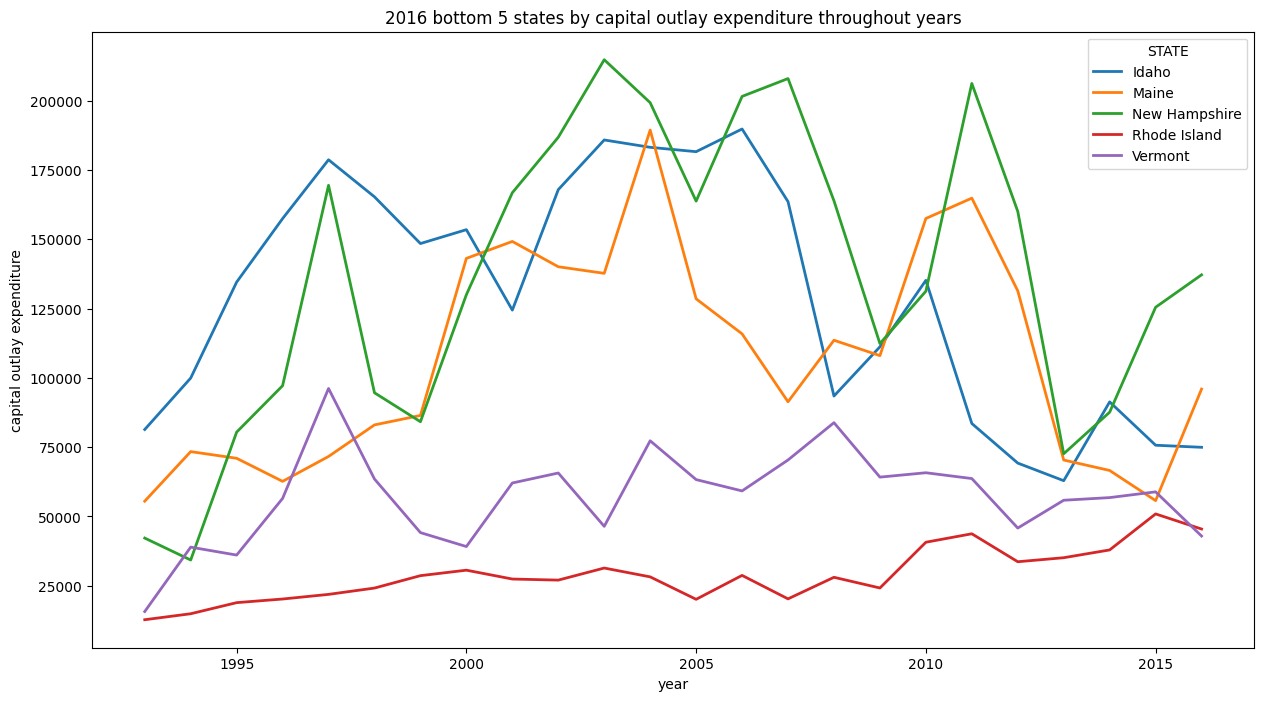

In [45]:
# plotting a line graph of states that have lowest capital outlay expenditure in 2016 throughout years
lowest_cap_out_2016 = expenditure_2016.sort_values(by='OUTLAY_RATIO')
cap_out_years = states[states['STATE'].isin(lowest_cap_out_2016.STATE.head())]
cap_out_exp = cap_out_years.reset_index().sort_values(by='YEAR')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=cap_out_exp, x="YEAR", y="CAPITAL_OUTLAY_EXPENDITURE",hue="STATE", linewidth=2)
plt.title('2016 bottom 5 states by capital outlay expenditure throughout years')
plt.xlabel('year')
plt.ylabel('capital outlay expenditure');

Here we can see a noticeable decrease in capital outlay expenditures in these states from around 2012.

### Ranking states on key metrics

Further in our analysis, we will assign ranks or weights to different metrics.

We will rank metrics such as Revenue per Student, Profit per Student and Capital Outlay Expenditure for each state.

After assigning ranks for each metric, we will calculate the sum of ranks for each state and find the top states with lowest sum of ranks in 2016.

In [46]:
# adding capital outlay ratio column to states df
TDOCEXP = (states["INSTRUCTION_EXPENDITURE"] + states["SUPPORT_SERVICES_EXPENDITURE"] + states["OTHER_EXPENDITURE"] + states["CAPITAL_OUTLAY_EXPENDITURE"])
states['CAPOUT_RATIO'] = states['CAPITAL_OUTLAY_EXPENDITURE'] / TDOCEXP
states.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,TOTAL_PROFIT,USD_per_student,USD_PROFIT_per_student,REGION,CAPOUT_RATIO
0,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207,-6042,3885.294538,-8.302690,South,0.072928
1,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791,65000,9833.586451,536.498399,West,0.123358
2,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139,-195970,5068.743466,-289.769140,West,0.198637
3,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824,-29158,4324.889543,-93.625575,South,0.073235
4,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760,-67648,5466.763539,-13.187290,West,0.070084


In [47]:
# assigning ranks to revenue per student, total profit, profit per student and capital outlay expenditure ratio
# for each metric, 
# rank: 1 - 51 (1 being highest rank)
states['STUDENT_REV_RANK'] = states.groupby('YEAR')['USD_per_student'].rank(ascending=False)
# states['PROFIT_RANK'] = states.groupby('YEAR')['TOTAL_PROFIT'].rank(ascending=False)
states['STUDENT_PROFIT_RANK'] = states.groupby('YEAR')['USD_PROFIT_per_student'].rank(ascending=False)
# 'ascending = True' - the lower the capital outlay ratio, the higher the rank
states['CAPOUT_RATIO_RANK'] = states.groupby('YEAR')['CAPOUT_RATIO'].rank(ascending=True)
# adding new column to the df with summed up ranks
states['RANK_SUM'] = states['STUDENT_REV_RANK'] + states['STUDENT_PROFIT_RANK'] + states['CAPOUT_RATIO_RANK']

In [48]:
# finding the top 10 states across all metrics
states[states.YEAR==2016][['STATE','STUDENT_REV_RANK', 'STUDENT_PROFIT_RANK','CAPOUT_RATIO_RANK', 'RANK_SUM']].sort_values(by='RANK_SUM').head(10)

,STATE,STUDENT_REV_RANK,STUDENT_PROFIT_RANK,CAPOUT_RATIO_RANK,RANK_SUM
1218,Vermont,3.0,11.0,2.0,16.0
1179,Connecticut,4.0,3.0,12.0,19.0
1212,Rhode Island,10.0,12.0,1.0,23.0
1192,Maine,17.0,5.0,4.0,26.0
1203,New Jersey,5.0,16.0,6.0,27.0
1194,Massachusetts,8.0,9.0,10.0,27.0
1195,Michigan,20.0,4.0,13.0,37.0
1202,New Hampshire,11.0,21.0,5.0,37.0
1184,Hawaii,13.0,1.0,24.0,38.0
1211,Pennsylvania,7.0,25.0,14.0,46.0


Further we'll look into dynamics of revenue per student, profitability and share of capital outlay expenditure in the top 10 ranking states over the last 6 years.

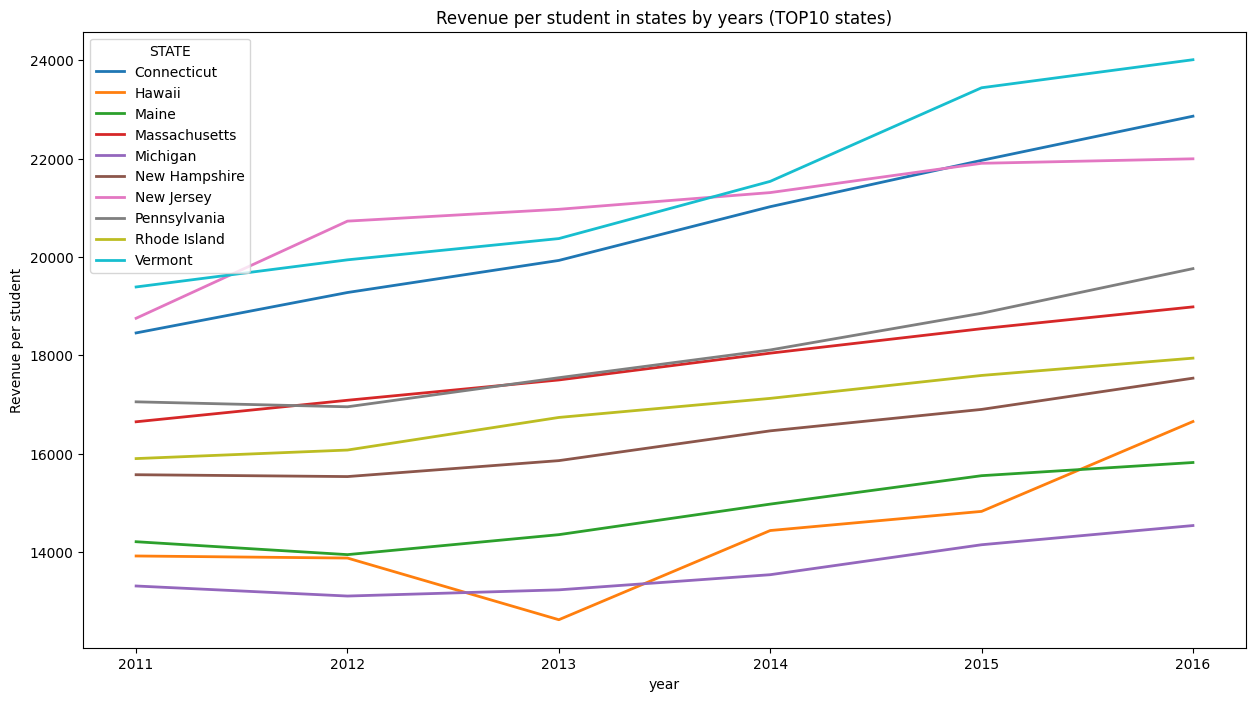

In [49]:
# plotting a line graph of revenue per student in the top 10 states for the last 6 years
top10states=states[states.YEAR==2016][['STATE','RANK_SUM']].sort_values(by='RANK_SUM')['STATE'].head(10)
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=states.query('(YEAR>=2011)&(STATE in @top10states)'), x="YEAR", y='USD_per_student',hue="STATE", linewidth=2)
plt.title('Revenue per student in states by years (TOP10 states)')
plt.xlabel('year')
plt.ylabel('Revenue per student');

States with positive dynamic and highest numbers of revenue per student:
* Vermont
* Connecticut
* New Jersey
* Pennsylvania
* Massachussets


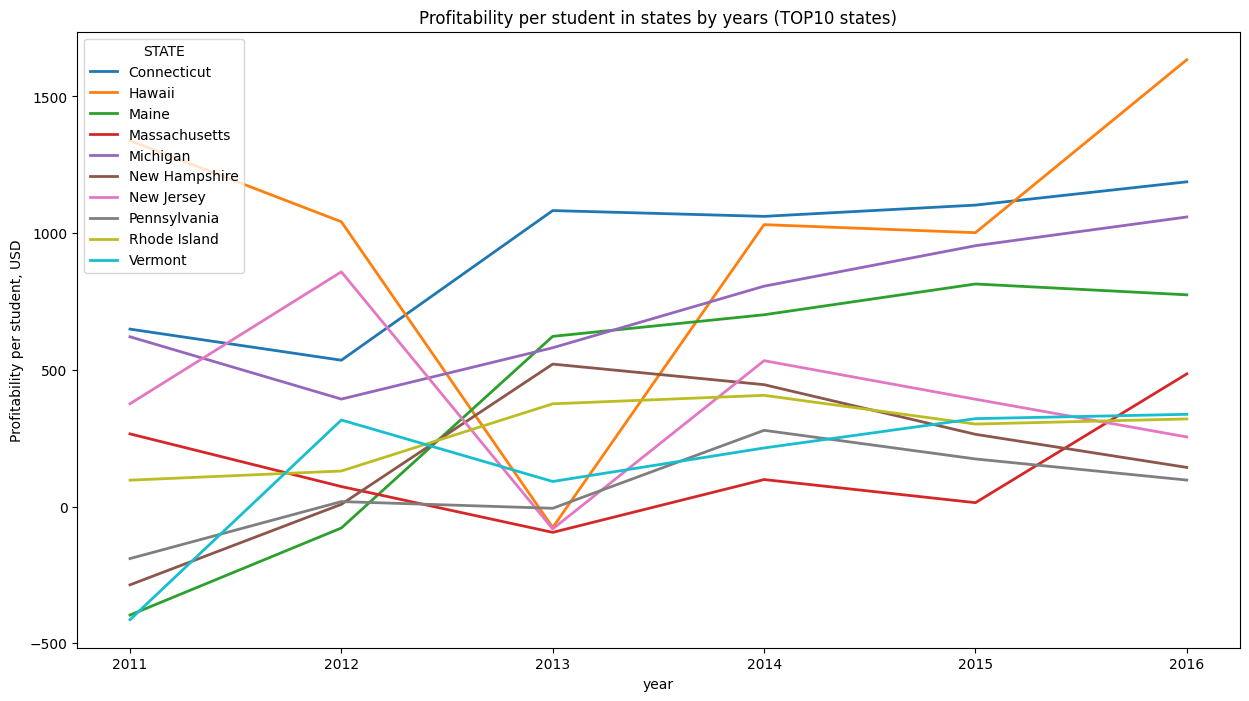

In [50]:
# plotting a line graph of profit per student in the top 10 states for the last 6 years
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=states.query('(YEAR>=2011)&(STATE in @top10states)'), x="YEAR", y='USD_PROFIT_per_student',hue="STATE", linewidth=2)
plt.title('Profitability per student in states by years (TOP10 states)')
plt.xlabel('year')
plt.ylabel('Profitability per student, USD');

States with positive dynamic of profit per student:
* Hawaii
* **Connecticut**
* Michigan
* Maine
* **Vermont**



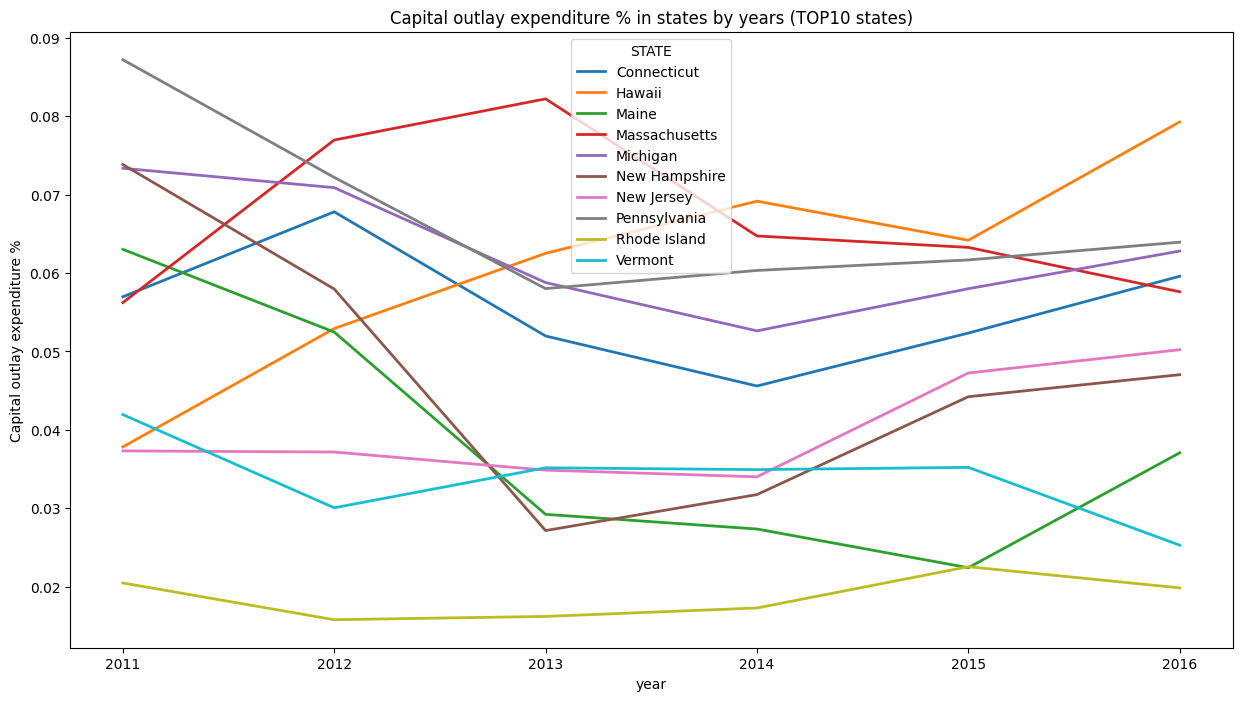

In [51]:
# plotting a line graph of capital outlay expenditure ratio in the top 10 states for the last 6 years
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=states.query('(YEAR>=2011)&(STATE in @top10states)'), x="YEAR", y='CAPOUT_RATIO',hue="STATE", linewidth=2)
plt.title('Capital outlay expenditure % in states by years (TOP10 states)')
plt.xlabel('year')
plt.ylabel('Capital outlay expenditure %');

States with negative dynamic (that is positive for us) of capital outlay expenditure share in total expenditure:
* Massachussets
* **Vermont**


### Districts

In [52]:
#districts.query('YRDATA>2010').info()

In [53]:
# looking at number of unique districts in each state
districts.query('(YRDATA>2010)').groupby('STATE')['NAME'].nunique().head()

STATE
Alabama        136
Alaska          54
Arizona        245
Arkansas       257
California    1116
Name: NAME, dtype: int64

In [54]:
# calculating the total profit for each district by subtracting total expenditure from total revenue
districts['TOTAL_PROFIT']=districts['TOTALREV']-districts['TOTALEXP']
# filtering districts that are profitable after the year 2010, 
# counting profitable districts within a state and calculating average profit for the districts
profitable_districts=districts.query('(YRDATA>2010)&(TOTAL_PROFIT>0)').groupby(['STATE','YRDATA']).agg(
    {'NAME':'count','TOTAL_PROFIT':'mean'}).reset_index()
# finding the maximum profit for each state and year
# among districts that are profitable and have data after 2010
profitable_districts_max=districts.query('(YRDATA>2010)&(TOTAL_PROFIT>0)').groupby(['STATE','YRDATA']).agg(
    {'TOTAL_PROFIT':'max'}).reset_index()
# merging the 2 dataframes
profitable_districts=profitable_districts.merge(profitable_districts_max,on=['STATE','YRDATA'],how='left')
profitable_districts.columns=['STATE','YRDATA','N_PROFITABLE_DISTRICTS','AVERAGE_ANNUAL_PROFIT','MAXIMUM_ANNUAL_PROFIT']
profitable_districts.head()

,STATE,YRDATA,N_PROFITABLE_DISTRICTS,AVERAGE_ANNUAL_PROFIT,MAXIMUM_ANNUAL_PROFIT
0,Alabama,2011,89,2851.865169,27885
1,Alabama,2012,92,2091.054348,25609
2,Alabama,2013,69,1348.942029,30170
3,Alabama,2014,59,2038.966102,35047
4,Alabama,2015,59,2008.474576,33234


In [55]:
# grouping the districts df by state and year and counting number of districts in a state
# summing up the enrollment in a state, total revenue and total expenditures
districts_11_16=districts.groupby(['STATE','YRDATA']).agg({'NAME':'count',
            'ENROLL':'sum','TOTALREV':'sum','TOTALEXP':'sum'}).reset_index().query('YRDATA>2010')
districts_11_16.rename(columns={"NAME": "N_DISTRICTS"},inplace=True)

# adding total profit column to districts_11_16 df
# calculating the total profit for each district by subtracting total expenditure from total revenue
districts_11_16['TOTAL_PROFIT']=districts_11_16['TOTALREV']-districts_11_16['TOTALEXP']

# merging the two dfs
districts_11_16=districts_11_16.merge(profitable_districts, on=['STATE','YRDATA'],how='left')

In [56]:
# calculating the percentage of profitable districts in each state and year
districts_11_16['%PROFITABLE_DISTRICTS']=districts_11_16['N_PROFITABLE_DISTRICTS']/districts_11_16['N_DISTRICTS']
# finding top states with most profitable districts in 2016
districts_11_16.query('YRDATA==2016').sort_values(by='%PROFITABLE_DISTRICTS', ascending=False).head(5)

,STATE,YRDATA,N_DISTRICTS,ENROLL,TOTALREV,TOTALEXP,TOTAL_PROFIT,N_PROFITABLE_DISTRICTS,AVERAGE_ANNUAL_PROFIT,MAXIMUM_ANNUAL_PROFIT,%PROFITABLE_DISTRICTS
71,Hawaii,2016,1,181995.0,3030519,2733094,297425,1.0,297425.000000,297425.0,1.000000
53,District of Columbia,2016,1,48336.0,1329719,1322563,7156,1.0,7156.000000,7156.0,1.000000
77,Idaho,2016,116,274849.0,2266490,2100980,165510,106.0,1572.320755,23774.0,0.913793
89,Indiana,2016,313,1002696.0,12732161,11535287,1196874,279.0,4446.996416,48970.0,0.891374
239,Rhode Island,2016,40,133856.0,2401541,2358654,42887,35.0,1334.657143,11225.0,0.875000


Hawaii and the District of Columbia each had 100% of their school districts profitable in 2016.

In [57]:
districts_11_16.query('STATE == "Vermont" and YRDATA == 2016')

,STATE,YRDATA,N_DISTRICTS,ENROLL,TOTALREV,TOTALEXP,TOTAL_PROFIT,N_PROFITABLE_DISTRICTS,AVERAGE_ANNUAL_PROFIT,MAXIMUM_ANNUAL_PROFIT,%PROFITABLE_DISTRICTS
275,Vermont,2016,316,87974.0,2112365,2082696,29669,163.0,460.539877,4442.0,0.515823


In Vermont approx. 52% of districts were profitable in 2016.

In [58]:
# finding top states with max annual profit in 2016
districts_11_16.query('YRDATA==2016').sort_values(by='MAXIMUM_ANNUAL_PROFIT', ascending=False).head(5)

,STATE,YRDATA,N_DISTRICTS,ENROLL,TOTALREV,TOTALEXP,TOTAL_PROFIT,N_PROFITABLE_DISTRICTS,AVERAGE_ANNUAL_PROFIT,MAXIMUM_ANNUAL_PROFIT,%PROFITABLE_DISTRICTS
29,California,2016,1051,6217031.0,89217262,85320133,3897129,817.0,6143.007344,643215.0,0.777355
137,Michigan,2016,599,1335713.0,19416061,18001445,1414616,450.0,4239.548889,310557.0,0.751252
71,Hawaii,2016,1,181995.0,3030519,2733094,297425,1.0,297425.000000,297425.0,1.000000
233,Pennsylvania,2016,595,1572593.0,31077289,30925177,152112,400.0,2641.287500,206653.0,0.672269
125,Maryland,2016,24,879196.0,14409321,13992191,417130,18.0,26830.111111,199357.0,0.750000


In [59]:
# creating a new df with Vermont districts only
v_districts=districts.query('STATE=="Vermont"')
#v_districts.info()

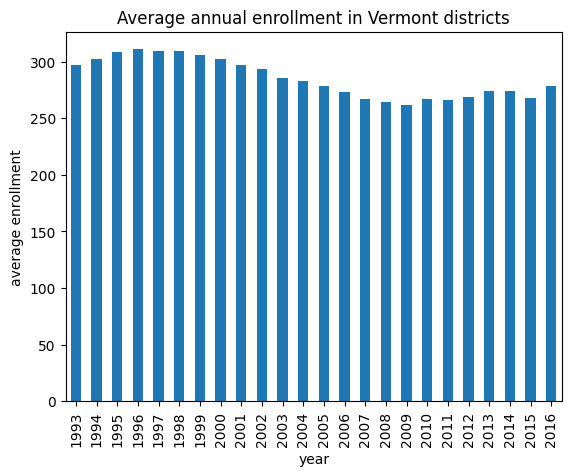

In [60]:
# grouping the data of Vermont districts by year and calculating the average enrollment for each year,
# plotting a bar plot
v_districts.groupby('YRDATA')['ENROLL'].mean().plot(kind="bar")
plt.title("Average annual enrollment in Vermont districts")
plt.xlabel("year")
plt.ylabel("average enrollment");

We see a declining trend in enrollment over the years. The highest average enrollment appears to be in the early 90s. It looks like fewer students have been enrolling in Vermont districts each year.

In [61]:
# finding mean revenue for 1 student in Vermont in 2016
v_districts.query('YRDATA==2016')['TOTALREV'].sum()*1000/v_districts.query('YRDATA==2016')['ENROLL'].sum()

24011.241957851184

In [62]:
# adding revenue per student column to Vermont districts
v_districts['USD_per_student']=v_districts['TOTALREV']*1000/v_districts['ENROLL']

In [63]:
# looking at rows with NaN values in revenue - USD per student
v_districts[v_districts['USD_per_student'].isna()]

,STATE,ENROLL,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT,TOTAL_PROFIT,USD_per_student
43489,Vermont,0.0,PATRICIA A HANNAFORD REGIONAL TECHNICAL CENTER...,2007,0,0,0,0,0,0,0,0.0,0,0,NaN
43739,Vermont,0.0,ATHENS TOWN SCHOOL DISTRICT,2007,0,0,0,0,0,0,0,0.0,0,0,NaN
102011,Vermont,0.0,GLASTENBURY SCHOOL DISTRICT,2012,0,0,0,0,16,16,0,0.0,0,-16,NaN
357062,Vermont,0.0,BURLINGTON SUPERVISORY DIST,1993,0,0,0,0,475,271,204,0.0,0,-475,NaN
357232,Vermont,0.0,MONTPELIER SUPERVISORY DIST,1993,0,0,0,0,147,103,44,0.0,0,-147,NaN


We have 0 enrollment and revenue in certain districts and years.

In [64]:
# querying year 2016 and 0 enrollment rows, 
# grouping them by state and finding the proportion of school districts with zero enrollment
(districts.query('(YRDATA==2016)&(ENROLL==0)').groupby('STATE')['ENROLL'].count()/districts.query(
    '(YRDATA==2016)').groupby('STATE')['ENROLL'].count()).sort_values(ascending=False).head(5)

STATE
Pennsylvania    0.159664
Vermont         0.158228
North Dakota    0.154589
Minnesota       0.153061
Ohio            0.144663
Name: ENROLL, dtype: float64

Vermont is the TOP2 state by the share of school districts with no enrollment in 2016.

In [65]:
v_districts.query('(YRDATA>=2011)&(ENROLL==0)').groupby('NAME').agg(
    {'ENROLL':'count','TOTALREV':'sum'}).sort_values(by=['TOTALREV'],ascending=False).head(5)

,ENROLL,TOTALREV
NAME,,
SOUTHWEST VERMONT SUPV UNION,6,138264
CHITTENDEN EAST SUPV UNION,6,89802
CHITTENDEN SOUTH SUPV UNION,6,87930
WINDHAM SOUTHEAST SUPV UNION,6,67155
RUTLAND NORTHEAST SUPV UNION,6,67032


Most of the districts with constant 0-Enrollment are Supervisory Unions (above-district structures that don't have their own enrollment).

In order to analyze enrollment in school districts, we should drop Supervisory Unions.

In [66]:
# removing districts with 'SUPV UNION' and 'SUPERVISORY UNION' in their names
v_districts_wo_unions=v_districts[~((v_districts['NAME'].str.contains("SUPV UNION"))|
                                  (v_districts['NAME'].str.contains("SUPERVISORY UNION")))] 

In [67]:
# counting districts in each year
v_districts_wo_unions.groupby('YRDATA')['NAME'].count().head()

YRDATA
1993    280
1994    280
1995    280
1996    281
1997    282
Name: NAME, dtype: int64

In [68]:
# looking at number of unique districts from 2011 onward
v_districts_wo_unions.query('(YRDATA>=2011)')['NAME'].nunique()

287

In [69]:
# checking the mistakes in school district name spelling
v_districts_wo_unions.query('(YRDATA>=2011)').groupby('NAME')['YRDATA'].count().sort_values(ascending=True).head(5)

NAME
Norton School District                                 1
BURLINGTON SUPERVISORY DISTRICT                        1
MOUNTAIN TOWNS REGIONAL EDUCATION DISTRICT USD #301    1
Mount Mansfield Modified USD #401A                     1
MT MANSFIELD MODIFIED UNION SCH DIST                   1
Name: YRDATA, dtype: int64

In [70]:
# changing 'Norton School District' to 'NORTON TOWN SCH DIST'
# changing 'MT MANSFIELD MODIFIED UNION SCH DIST' to 'MT MANSFIELD UNION SCH DIST 17'
v_districts_wo_unions['NAME']=v_districts_wo_unions['NAME'].replace('Norton School District','NORTON TOWN SCH DIST')
v_districts_wo_unions['NAME']=v_districts_wo_unions['NAME'].replace('MT MANSFIELD MODIFIED UNION SCH DIST','MT MANSFIELD UNION SCH DIST 17')

In [71]:
# studying the districts with minimal enrollment for the last 6 years
v_districts_wo_unions.query('(YRDATA>=2011)').groupby('NAME').agg(
    {'ENROLL':'sum','TOTALREV':'sum'}).sort_values(by=['ENROLL']).head(5)

,ENROLL,TOTALREV
NAME,,
BURLINGTON SUPERVISORY DISTRICT,0.0,4168
DUXBURY CORNER SCH DIST,0.0,151
PATRICIA A HANNAFORD REGIONAL TECHNICAL CENTER SCHOOL DISTRICT,0.0,23664
CASTLETON SCHOOL DISTRICT,0.0,1478
GLASTENBURY SCHOOL DISTRICT,0.0,15


In [72]:
# studying the dynamics of enrollment in districts with minimal enrollment in 2016
districts_wo_unions_pivot=v_districts_wo_unions.query('(YRDATA>=2011)').pivot_table(
    columns='YRDATA',index='NAME',values='ENROLL',aggfunc='max').reset_index()
districts_wo_unions_pivot.columns=['NAME','2011','2012','2013','2014','2015','2016']
districts_wo_unions_pivot.sort_values(by='2016').head(5)

,NAME,2011,2012,2013,2014,2015,2016
69,DUXBURY CORNER SCH DIST,0.0,0.0,0.0,0.0,0.0,0.0
172,NORTON TOWN SCH DIST,0.0,0.0,8.0,13.0,0.0,0.0
199,RIVER VALLEY REGIONAL TECHNICAL CENTER SCHOOL ...,0.0,0.0,0.0,0.0,0.0,0.0
218,SOUTHWEST VERMONT REGIONAL TECHNICAL SCHOOL CE...,0.0,0.0,0.0,0.0,0.0,0.0
179,PATRICIA A HANNAFORD REGIONAL TECHNICAL CENTER...,0.0,0.0,0.0,0.0,0.0,0.0


### NAEP (National Assessment of Educational Progress)

In [73]:
# looking at general info
naep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          2175 non-null   int64  
 1   STATE         2175 non-null   object 
 2   AVG_SCORE     2175 non-null   float64
 3   TEST_SUBJECT  2175 non-null   object 
 4   TEST_YEAR     2175 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 85.1+ KB


In [74]:
# checking unique test subjects
naep.TEST_SUBJECT.unique()

array(['Mathematics', 'Reading'], dtype=object)

In [75]:
# checking unique years
naep.YEAR.unique()

array([2017, 2015, 2013, 2011, 2009, 2007, 2005, 2003, 2000, 1996, 1992,
       1990, 2002, 1998, 1994], dtype=int64)

In [76]:
# checking unique states
naep.STATE.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'DoDEA'], dtype=object)

This dataset includes info on DoDEA - Department of Defense Education Activity, a federal school system. 

It operates schools in 11 foreign countries for citizens on military duty and DoD civilian families.

We won't be looking at DoDEA scores further.

In [77]:
# excluding DoDEA from naep df
naep = naep.query('STATE!="DoDEA"')
# naep.info()

In [78]:
# looking at number of scores in each year
naep.groupby('YEAR')['AVG_SCORE'].count().head()

YEAR
1990     38
1992    126
1994     40
1996     85
1998     77
Name: AVG_SCORE, dtype: int64

In [79]:
# looking at number of scores in each year of test year 4
naep.query('TEST_YEAR==4').groupby('YEAR')['AVG_SCORE'].count().head()

YEAR
1992    84
1994    40
1996    44
1998    40
2000    41
Name: AVG_SCORE, dtype: int64

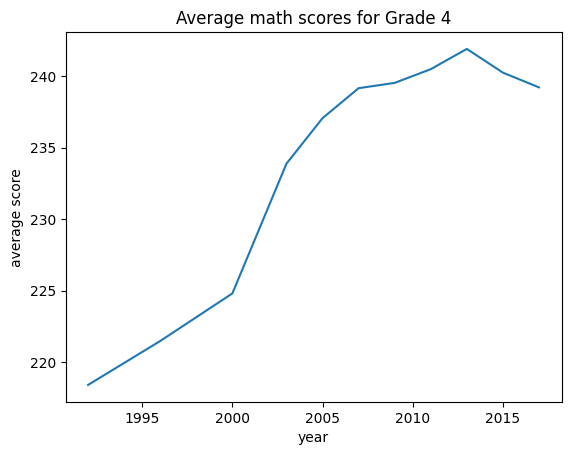

In [80]:
# filtering NAEP data for grade 4 math scores, calculating yearly averages
# plotting a lineplot
naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Mathematics")').groupby('YEAR')['AVG_SCORE'].mean().plot(kind="line")

plt.xlabel("year")
plt.ylabel("average score")
plt.title("Average math scores for Grade 4");

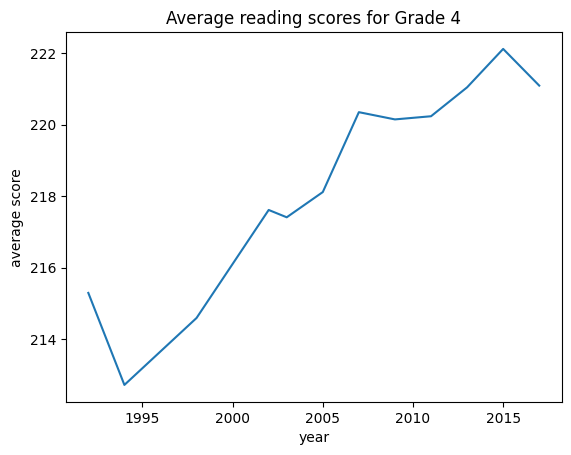

In [81]:
# filtering NAEP data for grade 4 reading scores, calculating yearly averages
# plotting a lineplot
naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Reading")').groupby('YEAR')['AVG_SCORE'].mean().plot(kind="line")

plt.xlabel("year")
plt.ylabel("average score")
plt.title("Average reading scores for Grade 4");

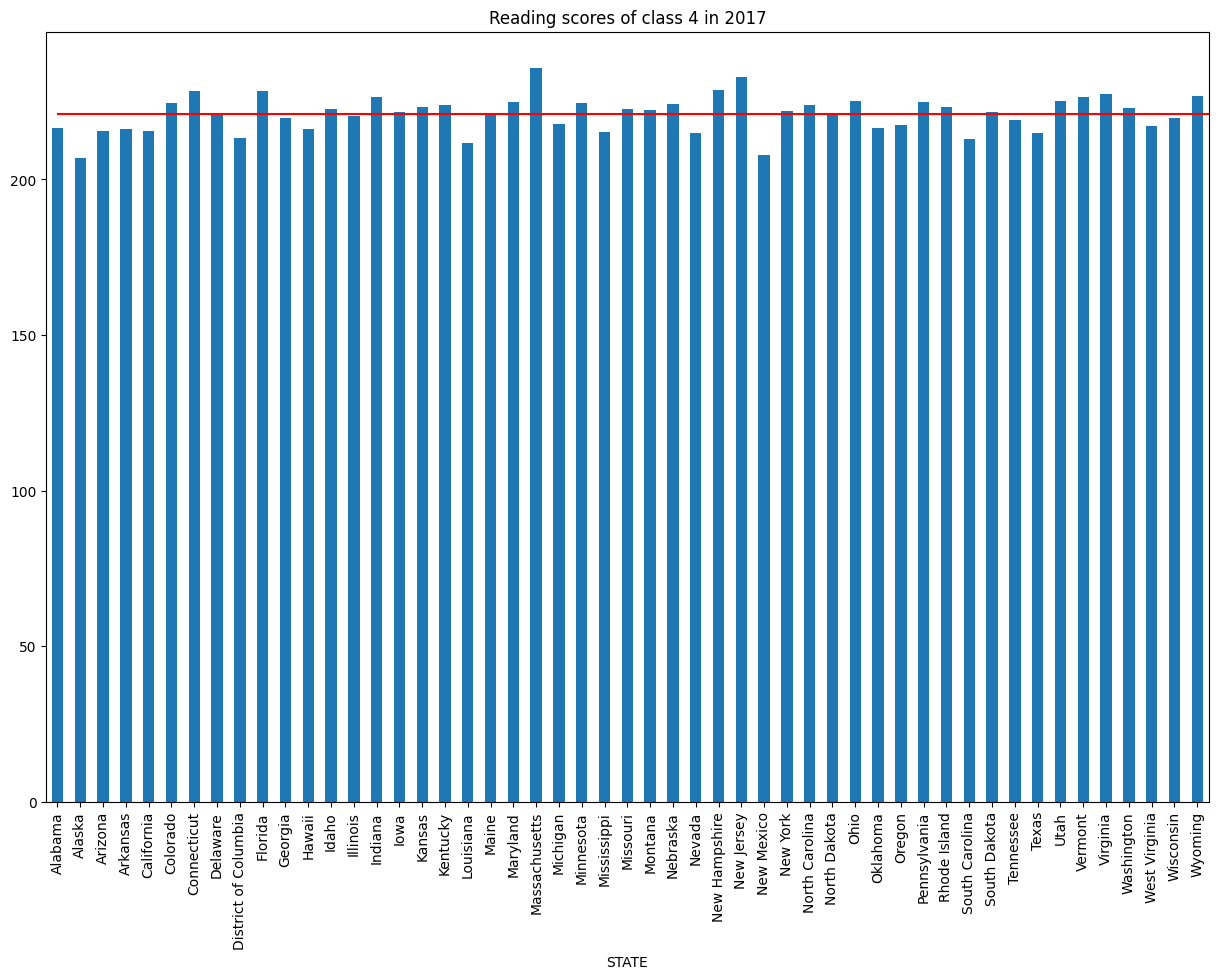

In [82]:
# plotting a bar chart of average reading scores by state for grade 4 in 2017
# adding horizontal line to show the national average score across all states for comparison
naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Reading")&(YEAR==2017)').groupby('STATE')['AVG_SCORE'].mean().plot(kind="bar",figsize=(15,10))
plt.hlines(y=naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Reading")&(YEAR==2017)')['AVG_SCORE'].mean(), color='red',xmin=0, xmax=51)
plt.title('Reading scores of class 4 in 2017')
plt.show()

Vermont's average reading score for 4th grade in 2017 appears to be above the national average.

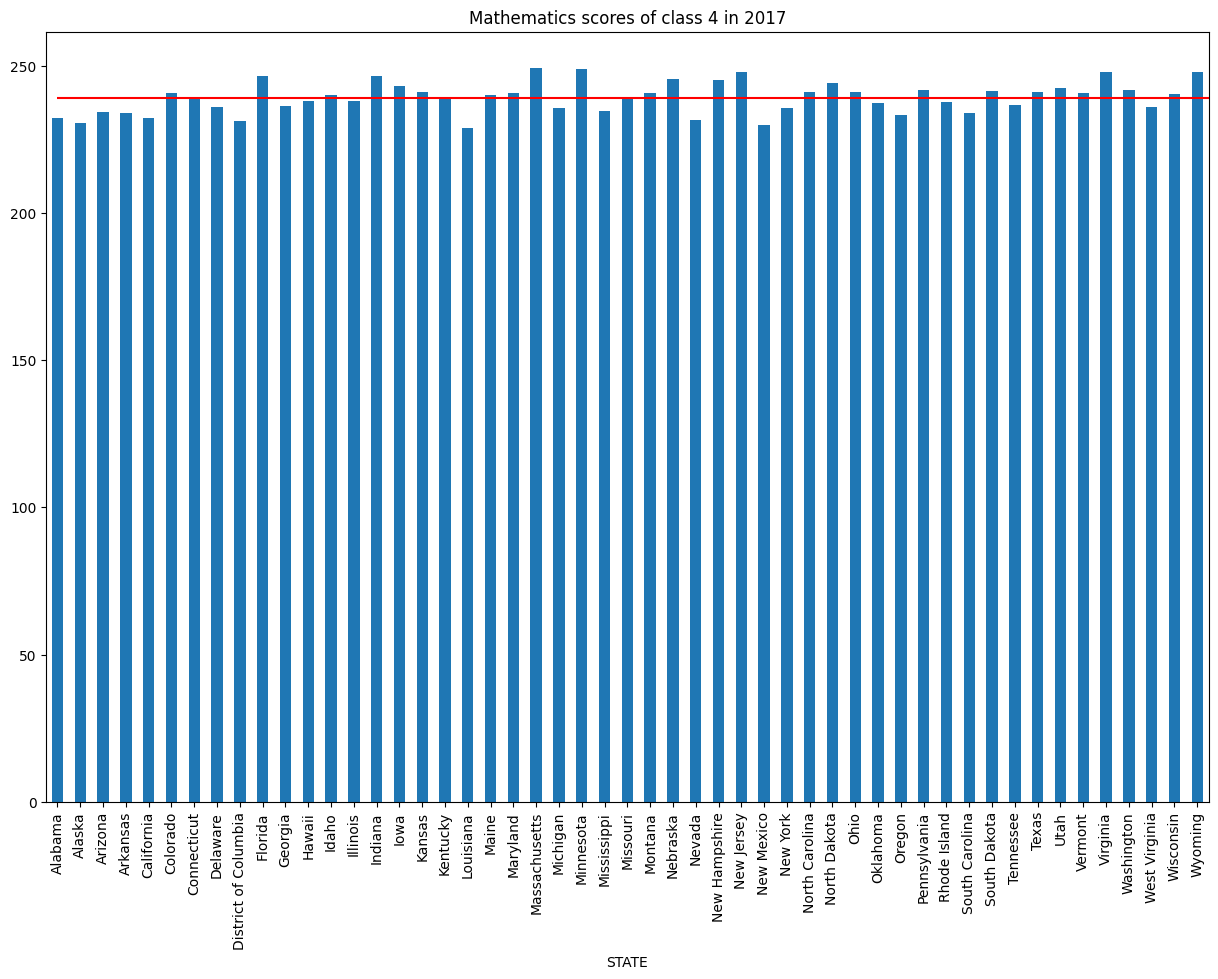

In [83]:
# plotting a bar chart of average math scores by state for grade 4 in 2017
# adding horizontal line to show the national average score across all states for comparison
naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Mathematics")&(YEAR==2017)').groupby('STATE')['AVG_SCORE'].mean().plot(kind="bar",figsize=(15,10))
plt.hlines(y=naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Mathematics")&(YEAR==2017)')['AVG_SCORE'].mean(), color='red',xmin=0, xmax=51)
plt.title('Mathematics scores of class 4 in 2017')
plt.show()

Here we can see that in 2017 Vermon'ts average math score for 4th grade is roughly equal to the national average score.

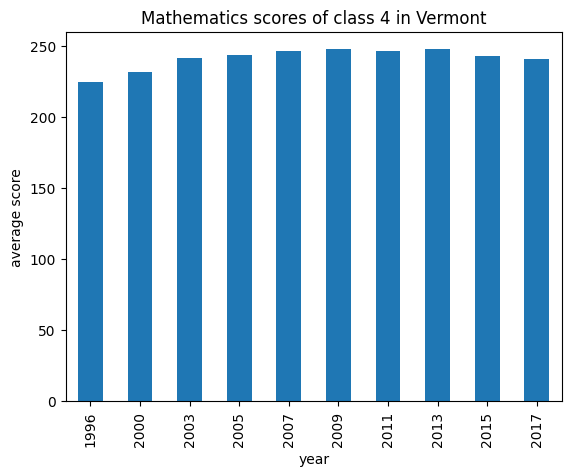

In [84]:
# filtering NAEP data for Vermont's grade 4 math scores, calculating yearly averages
# plotting a bar chart
naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Mathematics")&(STATE=="Vermont")').groupby('YEAR')['AVG_SCORE'].mean().plot(kind="bar")
plt.title('Mathematics scores of class 4 in Vermont')
plt.xlabel("year")
plt.ylabel("average score");

Class 4 math scores appear to be relatively stable across the years, however, we can see a slight decrease over the last years.

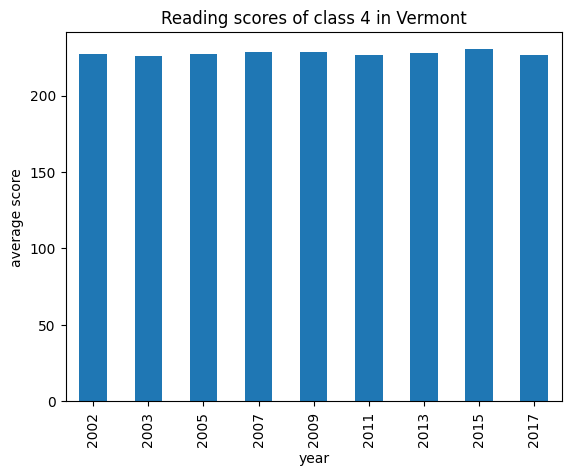

In [85]:
# filtering NAEP data for Vermont's grade 4 reading scores, calculating yearly averages
# plotting a bar chart
naep.query('(TEST_YEAR==4)&(TEST_SUBJECT=="Reading")&(STATE=="Vermont")').groupby('YEAR')['AVG_SCORE'].mean().plot(kind="bar")
plt.title('Reading scores of class 4 in Vermont')
plt.xlabel("year")
plt.ylabel("average score");

Class 4 average reading scores were high and stable over the years. It appears there's good reading instruction in Vermont's elementary education system.

### Predictions

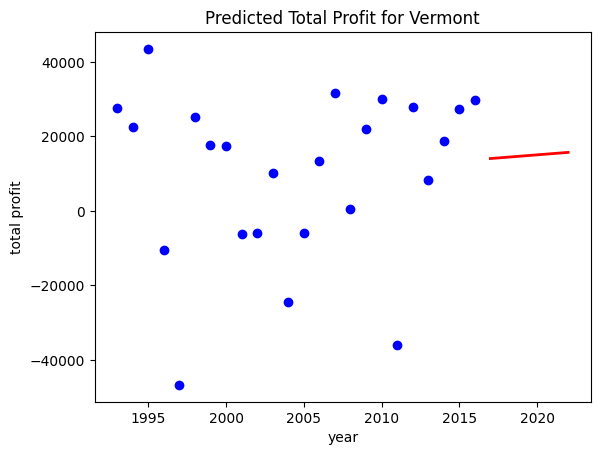

In [86]:
state_data = states[states['STATE'] == 'Vermont'][['YEAR', 'TOTAL_PROFIT']]

# Preparing the data for modeling
X = state_data['YEAR'].values.reshape(-1, 1)
y = state_data['TOTAL_PROFIT'].values


model = LinearRegression()
model.fit(X, y)

# Predicting future profits
future_years = np.array([2017, 2018, 2019,2020, 2021, 2022]).reshape(-1, 1)
predicted_profits = model.predict(future_years)

# Plotting
plt.scatter(X, y, color='blue')
plt.plot(future_years, predicted_profits, color='red', linewidth=2)
plt.title('Predicted Total Profit for Vermont')
plt.xlabel('year')
plt.ylabel('total profit')
plt.show()

## General conclusion and recommendations